### Histograma de Cores


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcular_histograma_hs(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    
    hist_hue = hist_hue / hist_hue.sum()
    hist_saturation = hist_saturation / hist_saturation.sum()
    
    return hist_hue, hist_saturation

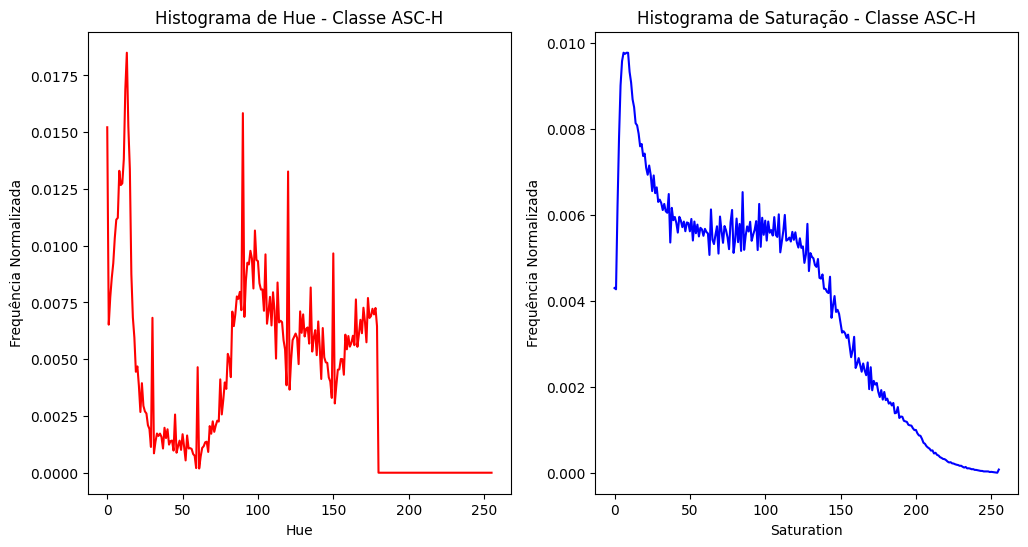

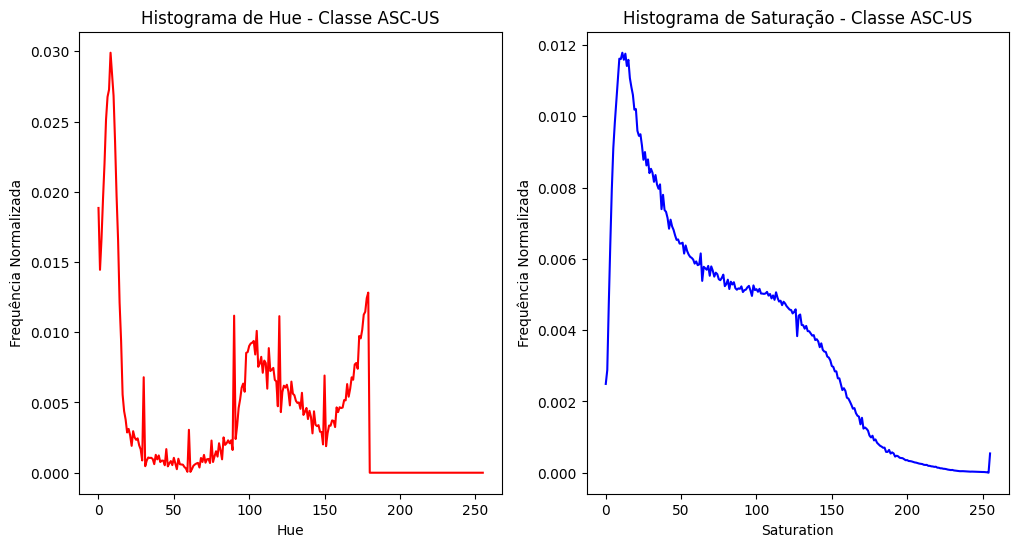

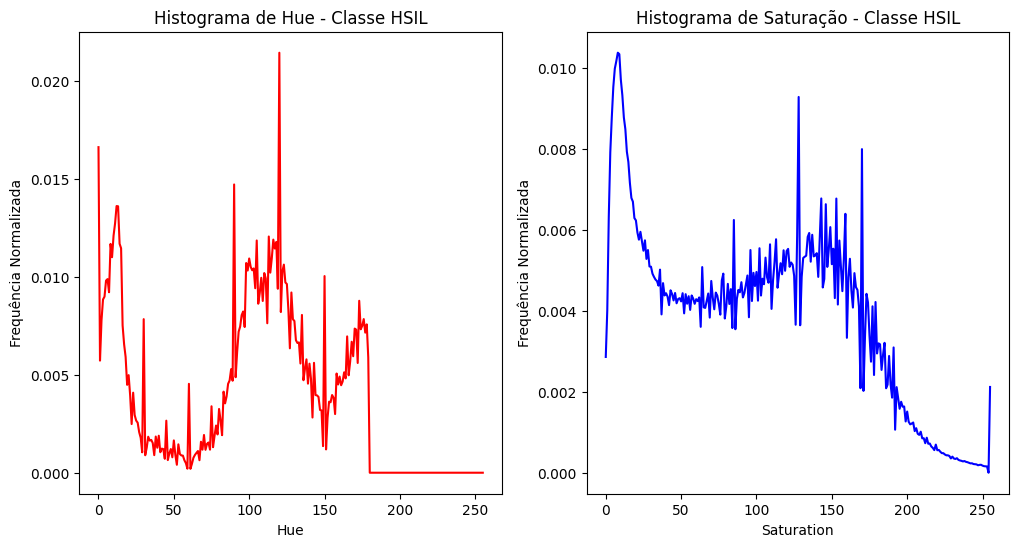

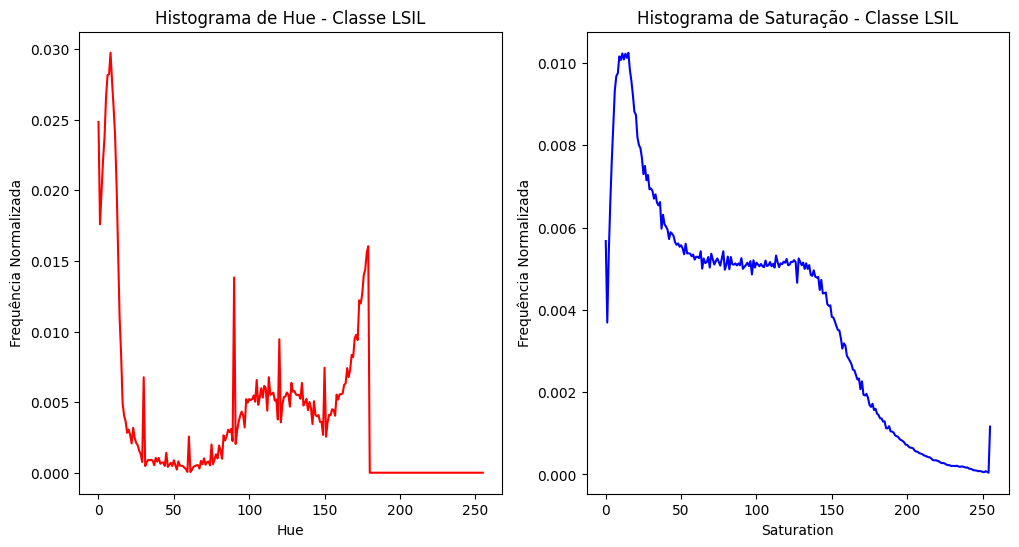

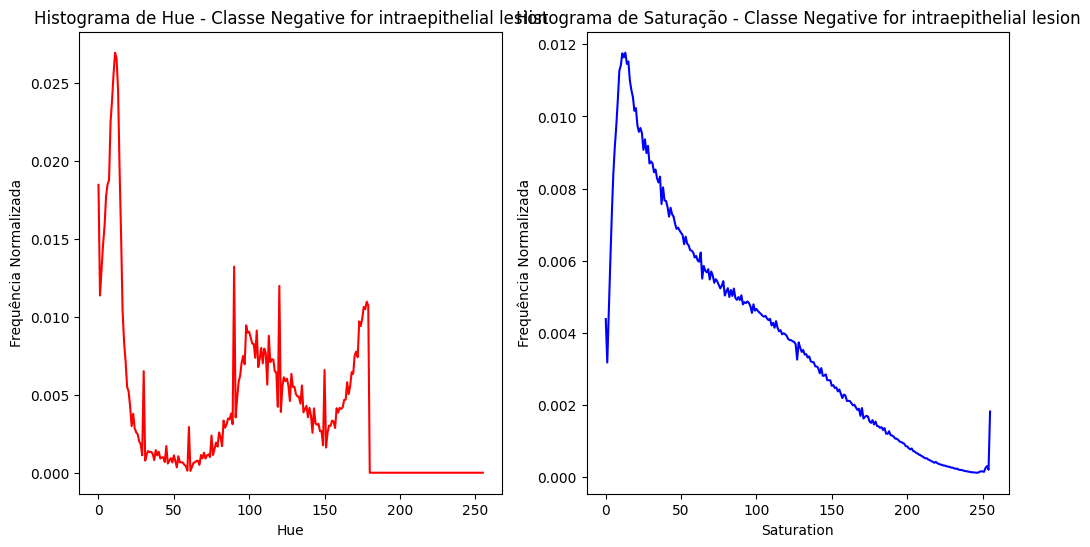

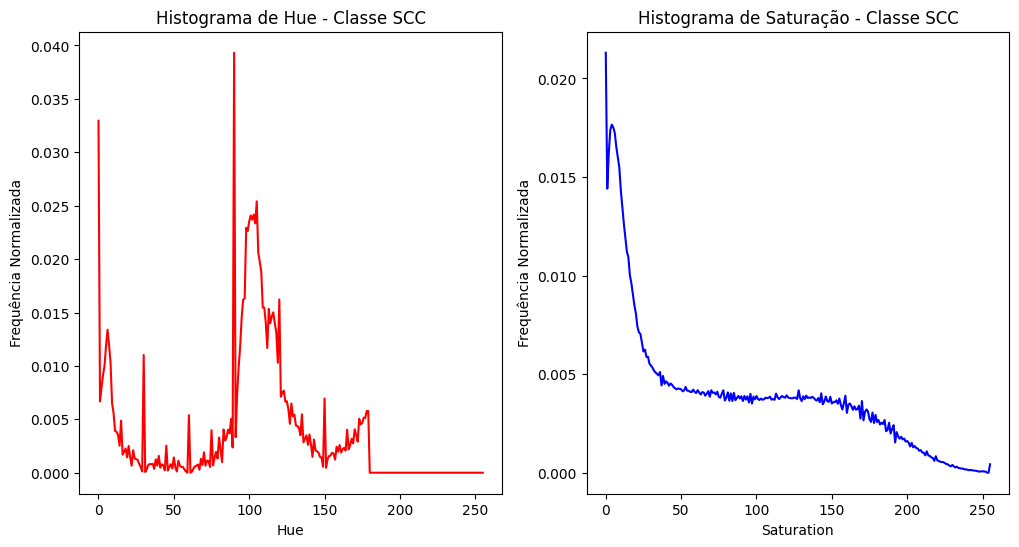

In [3]:
pasta_principal = "../data/base_recortada/"

subpastas = [f.path for f in os.scandir(pasta_principal) if f.is_dir()]

for subpasta in subpastas:
    classe = os.path.basename(subpasta)
    hist_h_total = np.zeros((256, 1))
    hist_s_total = np.zeros((256, 1))
    num_imagens = 0
    
    for filename in os.listdir(subpasta):
        caminho_imagem = os.path.join(subpasta, filename)
        
        imagem = cv2.imread(caminho_imagem)
        
        if imagem is not None:
            hist_h, hist_s = calcular_histograma_hs(imagem)
            hist_h_total += hist_h
            hist_s_total += hist_s
            num_imagens += 1
    
    if num_imagens > 0:
        hist_h_total /= num_imagens
        hist_s_total /= num_imagens
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(hist_h_total, color='r')
    plt.title(f'Histograma de Hue - Classe {classe}')
    plt.xlabel('Hue')
    plt.ylabel('Frequência Normalizada')

    plt.subplot(1, 2, 2)
    plt.plot(hist_s_total, color='b')
    plt.title(f'Histograma de Saturação - Classe {classe}')
    plt.xlabel('Saturation')
    plt.ylabel('Frequência Normalizada')

    plt.show()